In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import tree
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('dataset.csv')
len(df)*0.85

3723.0

In [3]:
df[3726:]

,Time_Segment,Holiday,Week_day,Vacation_week,Weekend Return,TM,Season,PPT,VVM10,Exceeds Threshold
3726,2-6,No,Wednesday,0,No,High,Autumn,Low,High,0
3727,6-10,No,Wednesday,0,No,High,Autumn,Low,High,0
3728,10-14,No,Wednesday,0,No,High,Autumn,Low,High,1
3729,14-18,No,Wednesday,0,No,High,Autumn,Low,High,1
3730,18-22,No,Wednesday,0,No,High,Autumn,Low,High,1
...,...,...,...,...,...,...,...,...,...,...
4375,6-10,Yes,Saturday,1,No,Medium,Winter,None,Medium,0
4376,10-14,Yes,Saturday,1,No,Medium,Winter,None,Medium,1
4377,14-18,Yes,Saturday,1,No,Medium,Winter,None,Medium,1
4378,18-22,Yes,Saturday,1,No,Medium,Winter,None,Medium,1


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def encoder(df):
    mapeo = {'Yes': 1, 'No': 0}
    df['Weekend Return']=df['Weekend Return'].map(mapeo)
    df=pd.get_dummies(df, columns=['Time_Segment', 'Season', 'Week_day', 'VVM10'])
    df = df.astype(float)

    return df
def tree_model():
    df = pd.read_csv('dataset.csv')
    df = encoder(df[['Weekend Return', 'Time_Segment', 'Season', 'VVM10', 'Week_day', 'Vacation_week', 'Exceeds Threshold']])
    # Split the data into features (X) and target (y)
    X = df.drop('Exceeds Threshold', axis=1)
    y = df['Exceeds Threshold']
    
    # Manually split the dataset (85% train, 15% test)
    split_index = int(len(df) * 0.85)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Initialize the LightGBM model
    model = DecisionTreeClassifier(max_depth=10, min_samples_leaf= 1, min_samples_split= 5)

    # Initialize GridSearchCV
   
    # Fit GridSearchCV
    model.fit(X_train, y_train)

    y_pred= model.predict(X_test)

    # Evaluate the best model on the test set
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    # Calculate accuracy

    # Calculate other evaluation metrics
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Optionally, visualize the confusion matrix

    plt.figure(figsize=(8, 6), dpi=300)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    
    feature_importance = model.feature_importances_
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance, y=X.columns, color='skyblue')
    
    
    
def main():
    tree_model()

C:\Users\julsd\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.77      0.81       326
         1.0       0.79      0.87      0.83       331

    accuracy                           0.82       657
   macro avg       0.82      0.82      0.82       657
weighted avg       0.82      0.82      0.82       657

Confusion Matrix:
[[250  76]
 [ 44 287]]


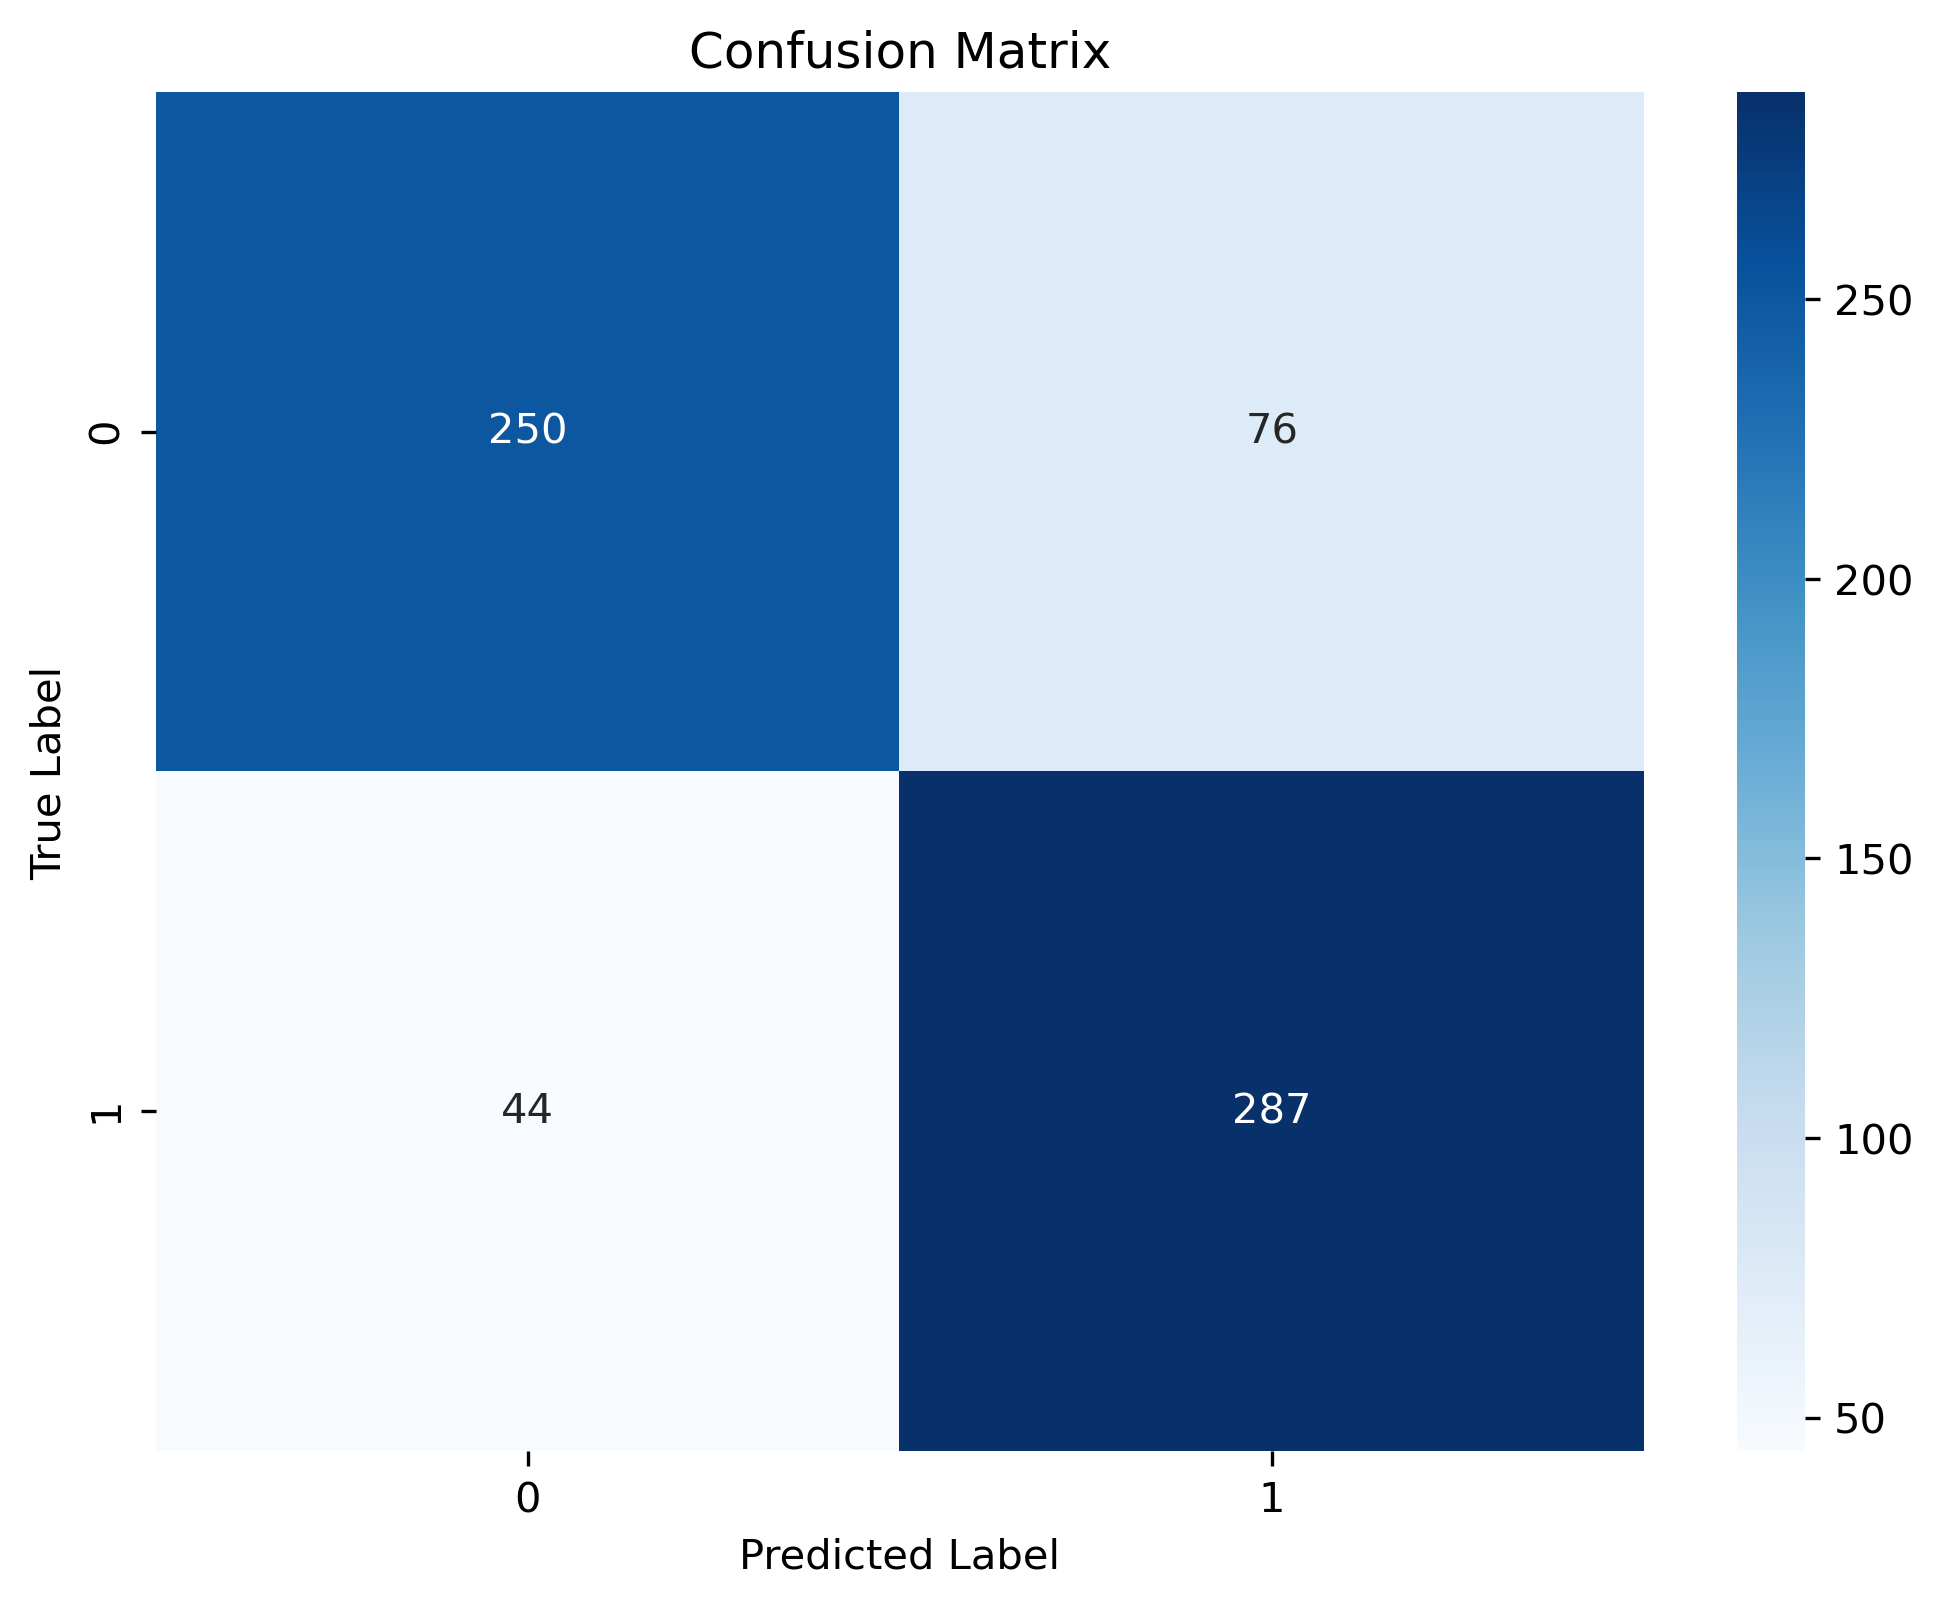

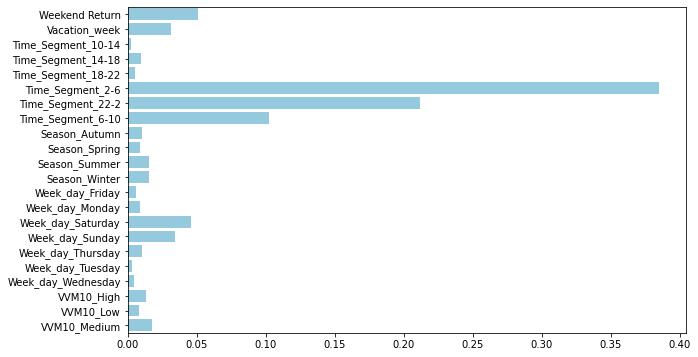

In [5]:
main()

Accuracy: 0.8188736681887366
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.77      0.81       326
         1.0       0.79      0.87      0.83       331

    accuracy                           0.82       657
   macro avg       0.82      0.82      0.82       657
weighted avg       0.82      0.82      0.82       657

Confusion Matrix:
[[250  76]
 [ 43 288]]


C:\Users\julsd\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


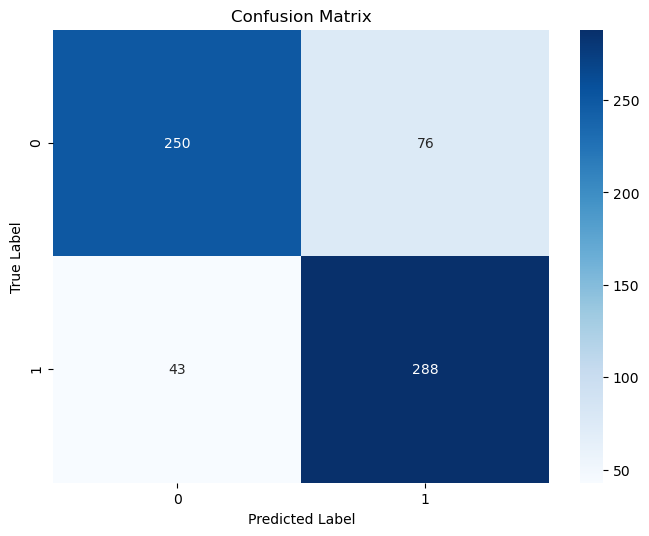

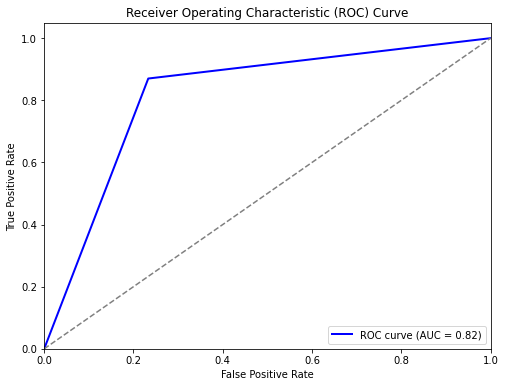

Sensitivity: 0.8700906344410876
Specificity: 0.7668711656441718


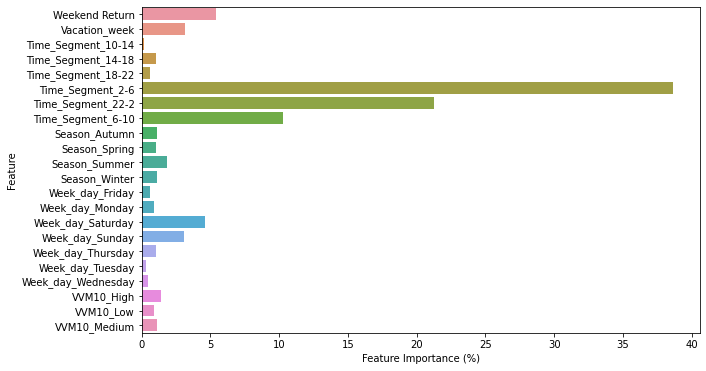

datasetfinal              Day Weekend Return Time_Segment  Season   VVM10   Week_day  \
3756  2022-09-19             No          2-6  Autumn  Medium     Monday   
3757  2022-09-19             No         6-10  Autumn  Medium     Monday   
3758  2022-09-19             No        10-14  Autumn  Medium     Monday   
3759  2022-09-19             No        14-18  Autumn  Medium     Monday   
3760  2022-09-19             No        18-22  Autumn  Medium     Monday   
3761  2022-09-19             No         22-2  Autumn  Medium     Monday   
3762  2022-09-20             No          2-6  Autumn  Medium    Tuesday   
3763  2022-09-20             No         6-10  Autumn  Medium    Tuesday   
3764  2022-09-20             No        10-14  Autumn  Medium    Tuesday   
3765  2022-09-20             No        14-18  Autumn  Medium    Tuesday   
3766  2022-09-20             No        18-22  Autumn  Medium    Tuesday   
3767  2022-09-20             No         22-2  Autumn  Medium    Tuesday   
3768  2022-0

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


def encoder(df):
    mapeo = {'Yes': 1, 'No': 0}
    df['Weekend Return']=df['Weekend Return'].map(mapeo)
    df=pd.get_dummies(df, columns=['Time_Segment', 'Season', 'Week_day', 'VVM10'])
    df = df.astype(float)
    return df

def tree_model():
    df = pd.read_csv('dataset.csv')
    df = encoder(df[['Weekend Return', 'Time_Segment', 'Season', 'VVM10', 'Week_day', 'Vacation_week', 'Exceeds Threshold']])

    # Split the data into features (X) and target (y)
    X = df.drop('Exceeds Threshold', axis=1)
    y = df['Exceeds Threshold']
    
    # Manually split the dataset (85% train, 15% test)
    split_index = int(len(df) * 0.85)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Initialize the DecisionTreeClassifier model
    model = DecisionTreeClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=5)

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Calculate other evaluation metrics
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6), dpi=100)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Calculate sensitivity and specificity
    sensitivity = tpr[np.argmax(tpr - fpr)]
    specificity = 1 - fpr[np.argmax(tpr - fpr)]
    print("Sensitivity:", sensitivity)
    print("Specificity:", specificity)

    # Plot feature importance
    feature_importance = model.feature_importances_
    feature_importance_percent = feature_importance / feature_importance.sum() * 100
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance_percent, y=X.columns)
    plt.xlabel('Feature Importance (%)')
    plt.ylabel('Feature')
    plt.show()
    #[4014:4056]
    df1=pd.read_csv('final_dataset.csv')
    df_final=df1[['Day','Weekend Return', 'Time_Segment', 'Season', 'VVM10', 'Week_day', 'Vacation_week', 'Exceeds Threshold']][3756:3798]
    df_final['Prediction']=y_pred[33:75].astype(int)
    print("datasetfinal", df_final)
    accuracy_f = accuracy_score(y_test[33:75], y_pred[33:75])
    print("Accuracy final:", accuracy_f)
    

    print(df_final.to_string(index=False))
    df_final.to_csv('tabla_final.csv', index=False)
    return df_final



def main():
    tree_model()

if __name__ == "__main__":
    main()


In [7]:
df = pd.read_csv('tabla_final.csv')

In [8]:
df

,Day,Weekend Return,Time_Segment,Season,VVM10,Week_day,Vacation_week,Exceeds Threshold,Prediction
0,2022-09-19,No,2-6,Autumn,Medium,Monday,1,0,0
1,2022-09-19,No,6-10,Autumn,Medium,Monday,1,0,1
2,2022-09-19,No,10-14,Autumn,Medium,Monday,1,1,1
3,2022-09-19,No,14-18,Autumn,Medium,Monday,1,1,1
4,2022-09-19,No,18-22,Autumn,Medium,Monday,1,1,1
5,2022-09-19,No,22-2,Autumn,Medium,Monday,1,1,0
6,2022-09-20,No,2-6,Autumn,Medium,Tuesday,1,0,0
7,2022-09-20,No,6-10,Autumn,Medium,Tuesday,1,0,1
8,2022-09-20,No,10-14,Autumn,Medium,Tuesday,1,1,1
9,2022-09-20,No,14-18,Autumn,Medium,Tuesday,1,1,1
